## Marketing Expenses Optimization Analysis

This project analyzes user behavior, sales performance, and marketing efficiency for an online ticketing service over a one-year period. The goal of the analysis is to evaluate how effectively marketing budgets are being spent and to identify which acquisition channels generate the highest long-term value.

The analysis is based on three datasets:
- Website visit logs, including user sessions, devices, and traffic sources
- Order history with purchase timestamps and revenue
- Daily marketing expenses by acquisition channel

The key business questions addressed in this project include:
- How users interact with the product over time (usage frequency, session duration, retention)
- How and when users convert into paying customers
- How much revenue each cohort generates over time (LTV)
- How much it costs to acquire customers from different marketing channels (CAC)
- Which marketing investments are profitable and which should be reconsidered (ROI)

The project applies cohort analysis, funnel metrics, and cumulative revenue calculations to compare performance across devices and acquisition sources. The results are presented through clear visualizations and are used to formulate data-driven recommendations for marketing budget allocation.


## 0. Load and Inspect Data

- Load the three datasets: `visits_log_us.csv`, `orders_log_us.csv`, and `costs_us.csv`
- Check column names, data types, and number of rows and columns
- Display the first few rows with `.head()`
- Review date formats, look for obvious inconsistencies or anomalies

## 1. Data Preparation and Cleaning

### 1.1 Optimize column types and rename columns (if necessary)

- Convert timestamps to datetime objects
- Ensure numerical fields are in the correct format
- Rename columns to follow a consistent and readable style

### 1.2 Handle missing values

- Identify missing values in all three datasets
- Decide on appropriate handling strategies (e.g., imputation, removal)

### 1.3 Remove duplicate records

- Check each dataset for full and partial duplicates
- Remove or resolve duplicates where appropriate

### 1.4 Removing Outliers

## 2. Product Usage Metrics

### 2.1 Daily, weekly, and monthly active users (DAU, WAU, MAU)

- Calculate the number of unique users per day, week, and month

### 2.2 Sessions per day

- Define and count sessions per user per day

### 2.3 Session length

- Calculate session durations using start and end timestamps
- Analyze average, median, and distribution of session lengths

### 2.4 User retention

- Build user cohorts based on first visit date
- Track cohort retention over time (e.g., by days, weeks)

## 3. Sales Analysis

### 3.1 Conversion delay

- Calculate time between first visit and first purchase
- Group users into cohorts by registration date and measure conversion lag (0d, 1d, etc.)

### 3.2 Number of orders per user

- Count orders made per user in the period

### 3.3 Average purchase size

- Calculate mean revenue per order

### 3.4 Customer Lifetime Value (LTV)

- Calculate revenue per user over time
- Use cohort-based LTV analysis

## 4. Marketing Effectiveness

### 4.1 Total and per-source costs

- Aggregate marketing spend overall and by source
- Analyze spend trends over time

### 4.2 Customer Acquisition Cost (CAC)

- Calculate CAC per source: `CAC = total_cost / number_of_customers`

### 4.3 Return on Investment (ROMI)

- Calculate ROMI per source: `ROMI = LTV / CAC`

## 5. Visualization

- Plot key metrics:
  - LTV, CAC, ROMI by source
  - ROMI and buyer count over time by source
- Compare metrics by device and source

## 6. Final Recommendations

- Which platforms/sources perform best?
- Where to increase or decrease investment?
- Backed by which metrics?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# 0. Load and Inspect Data


 VISITS DATA 
Shape: (359400, 5)


Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

 ORDERS DATA 
Shape: (50415, 3)


Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

 EXPENSES DATA 
Shape: (2542, 3)


source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
Revenue statistics (orders):
count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

Marketing cost statistics (expenses):
count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64


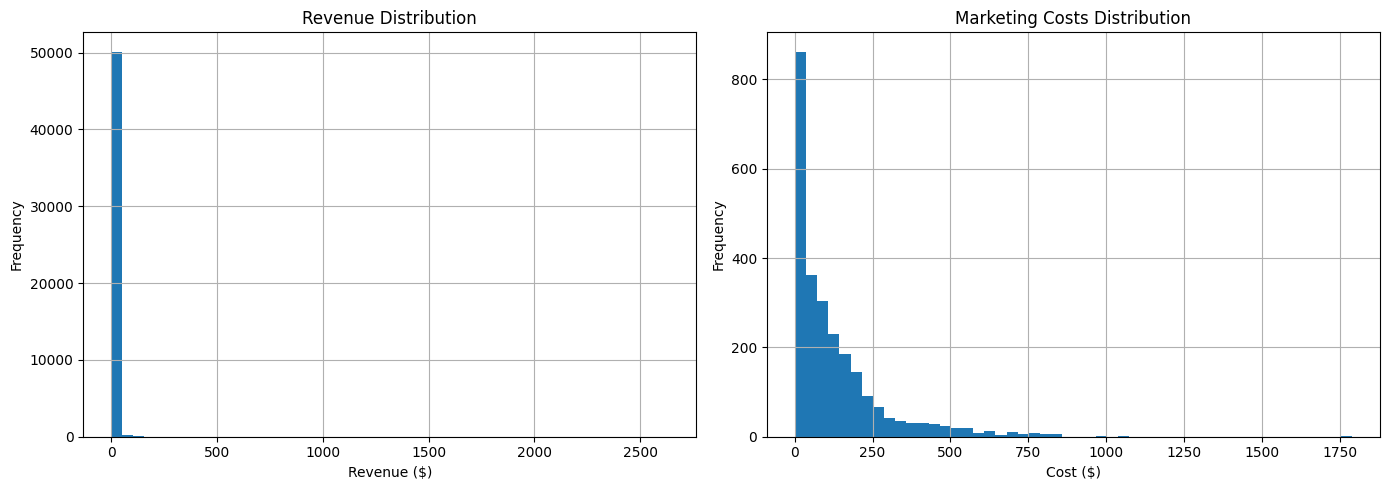

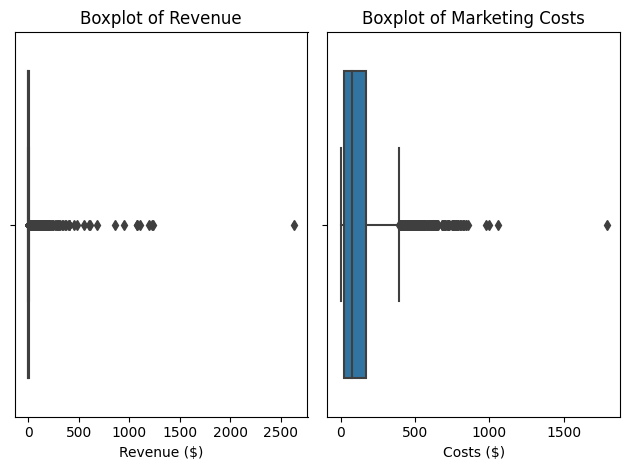

In [2]:
# Define file paths
file_paths = {
    'visits': '/datasets/visits_log_us.csv',
    'orders': '/datasets/orders_log_us.csv',
    'expenses': '/datasets/costs_us.csv' 
}

def load_and_inspect(paths_dict):
    for name, path in paths_dict.items():
        df = pd.read_csv(path)
        globals()[name] = df  # Assign to global variable

        print(f'\n {name.upper()} DATA ')
        print(f'Shape: {df.shape}')
        display(df.head())
        print(df.info())

# Load and inspect
load_and_inspect(file_paths)

# Revenue statistics
print('Revenue statistics (orders):')
print(orders['Revenue'].describe())

# Marketing costs statistics
print('\nMarketing cost statistics (expenses):')
print(expenses['costs'].describe())

# Plot histograms
plt.figure(figsize=(14, 5))

# Revenue distribution
plt.subplot(1, 2, 1)
orders['Revenue'].hist(bins=50)
plt.title('Revenue Distribution')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')

# Marketing costs distribution
plt.subplot(1, 2, 2)
expenses['costs'].hist(bins=50)
plt.title('Marketing Costs Distribution')
plt.xlabel('Cost ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show() 

# Boxplot for revenue
plt.subplot(1, 2, 1)
sns.boxplot(x=orders['Revenue'])
plt.title('Boxplot of Revenue')
plt.xlabel('Revenue ($)')

# Boxplot for marketing costs
plt.subplot(1, 2, 2)
sns.boxplot(x=expenses['costs'])
plt.title('Boxplot of Marketing Costs')
plt.xlabel('Costs ($)')

plt.tight_layout()
plt.show()

# Summary: Initial Data Inspection

We successfully loaded three datasets:

- `visits`: 359,400 rows × 5 columns — user sessions
- `orders`: 50,415 rows × 3 columns — purchases
- `expenses`: 2,542 rows × 3 columns — daily ad spend

All datasets have no missing values. However:

- Date columns (`Start Ts`, `End Ts`, `Buy Ts`, and `dt`) are currently in object format and should be converted to `datetime` for time-based analysis.
- Columns like `Device` and `Source Id`/`source_id` likely contain a limited number of unique values and should be converted to the `category` data type to reduce memory usage.
- Outliers were detected in both `Revenue` and marketing `costs` distributions. We will further examine the nature of these outliers and remove or adjust them if necessary to avoid distortions in analysis.

Next step: optimize data types and rename columns for consistency.


# 1.1 Optimize column types and rename columns

In [3]:
# Standardize column names
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']
expenses.columns = ['source_id', 'dt', 'costs']

# Convert date columns to datetime
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
expenses['dt'] = pd.to_datetime(expenses['dt'])

# Check number of unique values in potential categorical columns
for col in ['device', 'source_id']:
    n_unique = visits[col].nunique()
    print(f'{col}: {n_unique} unique values in visits')
    if n_unique < 50:
        visits[col] = visits[col].astype('category')
        print(f'  → Converted visits["{col}"] to category')

n_unique_sources = expenses['source_id'].nunique()
print(f'source_id: {n_unique_sources} unique values in expenses')
if n_unique_sources < 50:
    expenses['source_id'] = expenses['source_id'].astype('category')
    print('  → Converted expenses["source_id"] to category')

# Check result
print('\nvisits.dtypes:')
print(visits.dtypes)

print('\norders.dtypes:')
print(orders.dtypes)

print('\nexpenses.dtypes:')
print(expenses.dtypes)


device: 2 unique values in visits
  → Converted visits["device"] to category
source_id: 9 unique values in visits
  → Converted visits["source_id"] to category
source_id: 7 unique values in expenses
  → Converted expenses["source_id"] to category

visits.dtypes:
device             category
end_ts       datetime64[ns]
source_id          category
start_ts     datetime64[ns]
uid                  uint64
dtype: object

orders.dtypes:
buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

expenses.dtypes:
source_id          category
dt           datetime64[ns]
costs               float64
dtype: object


# 1.2 Handle missing values


In [4]:
# Check number of missing values in each table
print('Missing values in VISITS:')
print(visits.isna().sum())

print('\nMissing values in ORDERS:')
print(orders.isna().sum())

print('\nMissing values in EXPENSES:')
print(expenses.isna().sum())

Missing values in VISITS:
device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

Missing values in ORDERS:
buy_ts     0
revenue    0
uid        0
dtype: int64

Missing values in EXPENSES:
source_id    0
dt           0
costs        0
dtype: int64


# 1.3 Remove duplicate records

In [5]:
# Check full duplicates in each dataset
visits_dups = visits.duplicated().sum()
orders_dups = orders.duplicated().sum()
expenses_dups = expenses.duplicated().sum()

print(f'VISITS: {visits_dups} full duplicate rows')
print(f'ORDERS: {orders_dups} full duplicate rows')
print(f'EXPENSES: {expenses_dups} full duplicate rows')

VISITS: 0 full duplicate rows
ORDERS: 0 full duplicate rows
EXPENSES: 0 full duplicate rows


# 1.4 Outliers

In [6]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers
revenue_outliers = detect_outliers(orders, 'revenue')
costs_outliers = detect_outliers(expenses, 'costs')

# Print counts
print(f'Number of revenue outliers: {revenue_outliers.shape[0]}')
print(f'Number of cost outliers: {costs_outliers.shape[0]}')

# Display the outliers
print('\nRevenue Outliers:')
display(revenue_outliers.sort_values(by='revenue', ascending=False))

print('\nCost Outliers:')
display(costs_outliers.sort_values(by='costs', ascending=False))

Number of revenue outliers: 3990
Number of cost outliers: 189

Revenue Outliers:


buy_ts  revenue                   uid
23244 2017-12-10 20:17:00  2633.28   5539673724080479777
36522 2018-02-23 08:54:00  1236.28  11149926373378902217
36682 2018-02-24 09:25:00  1221.37  11149926373378902217
23165 2017-12-10 13:04:00  1195.64   5539673724080479777
24607 2017-12-17 18:06:00  1109.10  11149926373378902217
...                   ...      ...                   ...
2068  2017-06-27 10:06:00    10.50   3076884661339524363
42207 2018-03-26 22:41:00    10.49  16494268845746739230
42242 2018-03-27 00:31:00    10.49  16494268845746739230
556   2017-06-06 12:27:00    10.45   2545549556353316151
736   2017-06-07 10:55:00    10.45  15676146341724082798

[3990 rows x 3 columns]


Cost Outliers:


source_id         dt    costs
902          3 2017-11-24  1788.28
919          3 2017-12-11  1061.18
1005         3 2018-03-07   996.15
853          3 2017-10-06   980.52
936          3 2017-12-28   858.28
...        ...        ...      ...
889          3 2017-11-11   396.88
957          3 2018-01-18   396.24
948          3 2018-01-09   396.09
1050         3 2018-04-23   396.01
1237         4 2017-10-27   395.49

[189 rows x 3 columns]

We reviewed the distributions of outliers in both revenue and marketing costs.

The marketing costs appear to follow a natural, though slightly skewed, distribution. High values occur infrequently but plausibly reflect expensive campaigns or seasonal spikes. Given the nature of marketing — where large investments are sometimes necessary — we consider such deviations normal and will retain all cost records. Removing them could distort ROI metrics and hide important business insights.

For revenue, the distribution is highly skewed and contains extreme values. It is important to note that revenue in this context reflects the service fee that the platform receives per ticket purchase — not the total transaction amount.

Nevertheless, since revenue is our key business metric, we will not remove any values from the orders table. Instead, we will keep in mind the presence of these anomalies and take them into account when interpreting the results.

###  Summary: Data Preparation and Cleaning

- No missing values or duplicate rows were found in any of the datasets.
- Column names were standardized for consistency.
- Date columns were converted to `datetime` format.
- Categorical columns (`device`, `source_id`) were identified and converted to `category` to optimize memory usage.
- Revenue outliers were detected using an IQR-based method with a relaxed threshold (3.0 × IQR). 

# 2.1 Daily, Weekly, and Monthly Active Users (DAU, WAU, MAU)

In [7]:
# Extract date components
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].values.astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].values.astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].values.astype('datetime64[D]')

In [8]:
# dau
dau=visits.groupby(visits['session_date'])['uid'].nunique().reset_index()
dau.head()

session_date  uid
0   2017-06-01  605
1   2017-06-02  608
2   2017-06-03  445
3   2017-06-04  476
4   2017-06-05  820

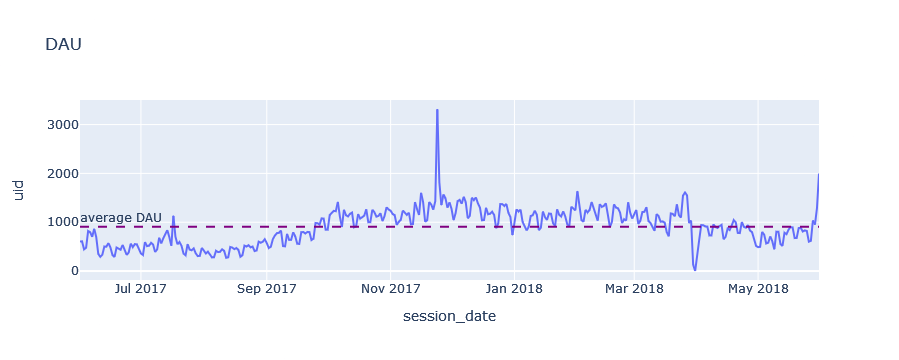

In [9]:
fig = px.line(dau,x="session_date", y="uid",title='DAU')

#adding reference line with average DAU over time
fig.add_hline(y=dau['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
fig.show()

DAU fluctuates around the average ~900 (dashed line). On Nov 24, 2017 — Black Friday, there’s a sharp spike >3000, likely driven by promotions and heavy traffic. Activity then settles near 1–1.3K. A deep dip on Mar 31, 2018 likely reflects the Easter/Passover weekend or a temporary outage/tracking gap.

In [10]:
# wau
wau=visits.groupby(visits['session_week'])['uid'].nunique().reset_index()
wau.head()

session_week   uid
0   2017-06-01  4082
1   2017-06-08  3311
2   2017-06-15  2844
3   2017-06-22  3079
4   2017-06-29  3055

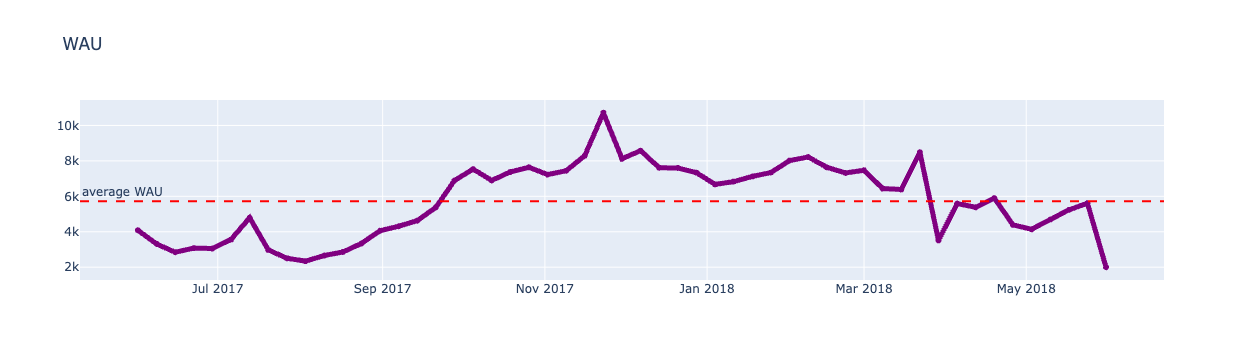

In [11]:
fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="WAU")))
fig.add_trace(go.Scatter(x=wau['session_week'], 
                        y=wau['uid'],
                    mode='lines+markers',
                    name='lines+markers',line = dict(color='purple', width=5)))

#adding reference line with average DAU over time
fig.add_hline(y=wau['uid'].mean(),line_dash="dash", line_color="red", annotation_text="average WAU",
             annotation_position="top left")
fig.show()

WAU follows a similar pattern to DAU. Weekly activity steadily grows through 2017, peaking around Black Friday (Nov 2017), then stabilizes above the average (~6000). Seasonal dips are visible in spring 2018, mirroring the DAU trend.

In [12]:

# mau
mau=visits.groupby(visits['session_month'])['uid'].nunique().reset_index()
mau.head()


session_month    uid
0    2017-06-01  13259
1    2017-07-01  14183
2    2017-08-01  11631
3    2017-09-01  18975
4    2017-10-01  29692

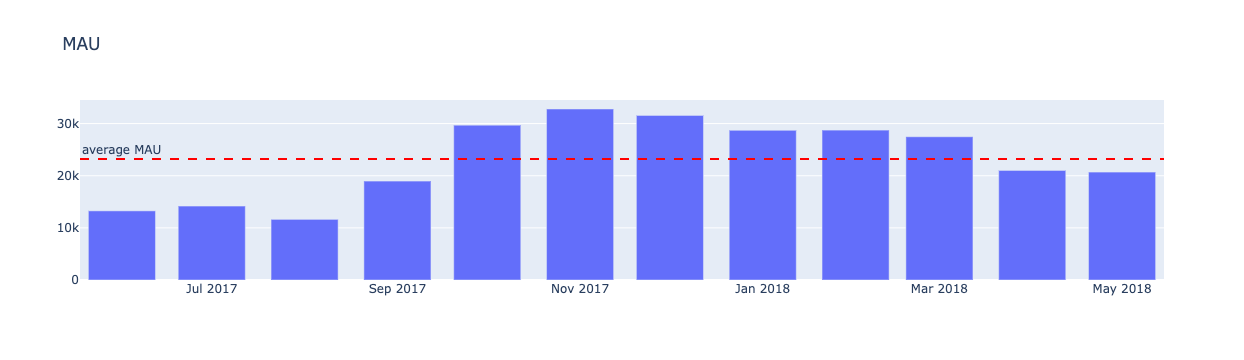

In [13]:
fig = go.Figure(layout=go.Layout(title=go.layout.Title(text='MAU')))
fig.add_trace(go.Bar(
    x=mau['session_month'],
    y=mau['uid'],
    name='MAU'
))

# средняя линия
fig.add_hline(
    y=mau['uid'].mean(),
    line_dash='dash',
    line_color='red',
    annotation_text='average MAU',
    annotation_position='top left'
)

fig.show()

MAU shows steady growth from mid-2017, peaking in Nov–Dec 2017 (holiday and Black Friday period), then stabilizing in early 2018. After March, monthly activity declines below the average line, indicating a seasonal drop in user engagement.

In [14]:
# Calculate average number of unique users per day, week, and month
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

# Display the results
print('Average DAU:', int(dau_total))
print('Average WAU:', int(wau_total))
print('Average MAU:', int(mau_total))

Average DAU: 907
Average WAU: 5621
Average MAU: 23228


In [15]:
# Extract scalar values from series
dau = dau_total.values[0]
wau = wau_total.values[0]
mau = mau_total.values[0]

# Calculate sticky factors
sticky_week = dau / wau
sticky_month = dau / mau

# Display results
print(f'Sticky Factor (DAU/WAU): {sticky_week:.3f}')
print(f'Sticky Factor (DAU/MAU): {sticky_month:.3f}')

Sticky Factor (DAU/WAU): 0.162
Sticky Factor (DAU/MAU): 0.039


**Summary: Average DAU/WAU/MAU and Sticky Factor**

On average, 907 users were active daily, 5,716 weekly, and 23,228 monthly.  
The weekly sticky factor (DAU/WAU) is 0.159, meaning around 16% of weekly users visit the platform on a given day.  
The monthly sticky factor is significantly lower at 0.039, suggesting that most users interact with the product only occasionally.  
This behavior is typical for event-related services  — users visit only when they are actively planning to attend an event.


# 2.2 Average sessions per day and per user

Let's start by finding the number of sessions for each day and plotting a line chart.  
After that, we will look at the average values.

In [16]:
# number of sessions.

dau_new = (
    visits.groupby('session_date')
    .agg(
        sessions=('uid', 'count'),     
        unique_users=('uid', 'nunique') 
    )
    .reset_index()
)

dau_new['sessions_per_user'] = dau_new['sessions'] / dau_new['unique_users']

dau_new.head()

session_date  sessions  unique_users  sessions_per_user
0   2017-06-01       664           605           1.097521
1   2017-06-02       658           608           1.082237
2   2017-06-03       477           445           1.071910
3   2017-06-04       510           476           1.071429
4   2017-06-05       893           820           1.089024

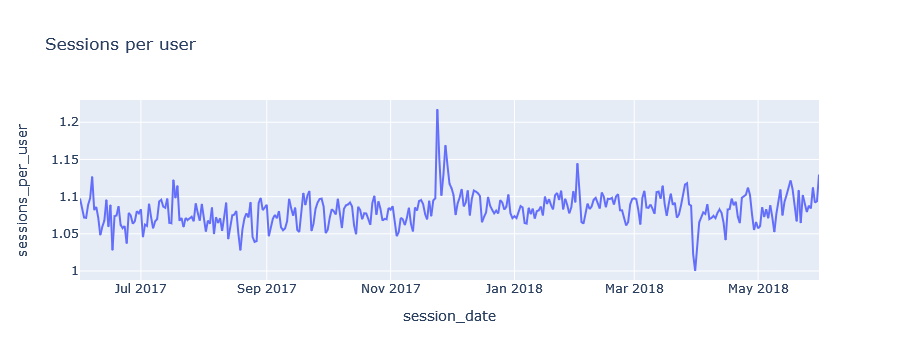

In [17]:
#let's plot sessions per user
fig = px.line(dau_new,
              x="session_date", y="sessions_per_user",title='Sessions per user',
               )
fig.show()

Sessions per user remain stable slightly above 1, with minor peaks and dips, showing most users log in once per day with some repeat activity.

Let's visualize sessions and DAU together:

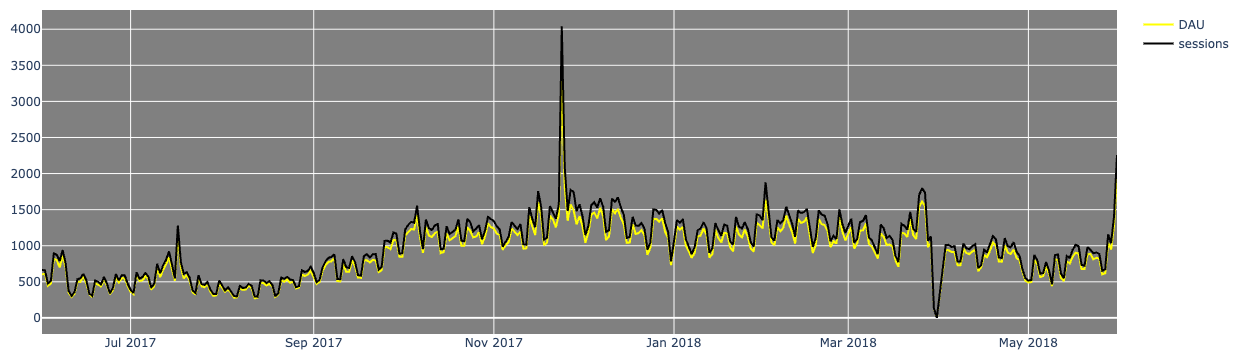

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dau_new['session_date'], 
                        y=dau_new['unique_users'],
                    mode='lines',
                    name='DAU',line = dict(color='yellow', width=2 )))

fig.add_trace(go.Scatter(x=dau_new['session_date'], 
                        y=dau_new['sessions'], 
                       
                    mode='lines',
                    name='sessions',line = dict(color='black', width=2 )))


fig.update_layout(
    showlegend=True,
    plot_bgcolor="grey",
    margin=dict(t=10,l=10,b=10,r=10)
)


fig.show()

Both DAU and sessions follow the same trend: steady growth from summer 2017, a sharp spike on Black Friday (Nov 2017), and a drop at the end of March 2018. Sessions consistently stay slightly above DAU, reflecting multiple visits by some users.

In [19]:
# Total sessions per day
sessions_per_day = visits.groupby('session_date').agg({'uid': 'count'})
avg_sessions_per_day = sessions_per_day['uid'].mean()

# Unique users per day
unique_users_per_day = visits.groupby('session_date').agg({'uid': 'nunique'})
avg_users_per_day = unique_users_per_day['uid'].mean()

# Average sessions per user per day
avg_sessions_per_user_per_day = avg_sessions_per_day / avg_users_per_day

# Output
print('Average sessions per day:', round(avg_sessions_per_day, 2))
print('Average unique users per day:', round(avg_users_per_day, 2))
print('Average sessions per user per day:', round(avg_sessions_per_user_per_day, 3))

Average sessions per day: 987.36
Average unique users per day: 907.99
Average sessions per user per day: 1.087


**Summary: Sessions per Day**

On average, the platform records approximately 987 sessions per day, with about 908 unique users.  
This means users typically initiate just over one session per day (1.09 on average), which indicates moderate daily engagement.  
The data suggests that while most users visit once per day, a small portion return for multiple sessions.

Comparing the trends, DAU and sessions move in parallel — both grow steadily through 2017, peak on Black Friday in November, and drop sharply at the end of March 2018. Sessions are consistently above DAU, which indicates that some users return multiple times per day. At the same time, the sessions_per_user metric remains stable slightly above 1, with only minor deviations in November and March. **This shows that the main changes in traffic are driven by the size of the active audience rather than by changes in individual engagement.**

# 2.3 Session Length Analysis

Average session duration (seconds): 643.51


<AxesSubplot:>

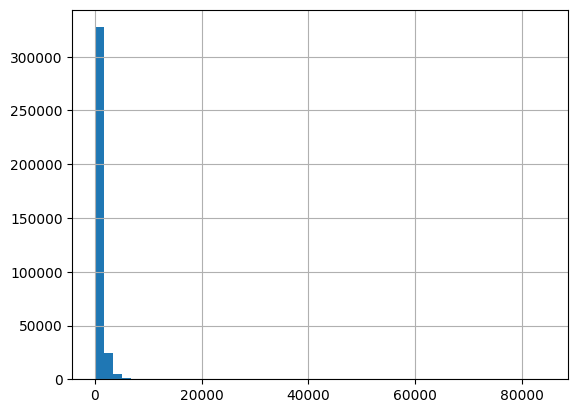

In [20]:
# Calculate session duration in seconds
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

# Average duration
mean_duration = visits['session_duration_sec'].mean()
print('Average session duration (seconds):', round(mean_duration, 2))

# Plot histogram
visits['session_duration_sec'].hist(bins=50)


The distribution of session duration is heavily right-skewed, with most sessions lasting only a short time and a few lasting significantly longer.  
In such cases, the mean is not a reliable metric.  
The mode was used instead, as it better reflects the typical session length.

In [21]:
# Calculate mode as more robust metric
mode_duration = visits['session_duration_sec'].mode()
print('Most frequent session duration (mode, seconds):', mode_duration.values)

Most frequent session duration (mode, seconds): [60]


**Summary: Session Length**

Most sessions are very short, and the distribution of session durations is heavily skewed to the right.  
The average value is inflated by a small number of extremely long sessions, making the mean unreliable.  
Instead, the mode was used: the most frequent session duration is 60 seconds,  
which likely reflects typical user behavior — users briefly check the site and leave within a minute.

# 2.4 User Retention

Although weekly retention is commonly used in product analytics, we chose to calculate retention using **monthly cohorts**.  
This decision is based on the nature of Yandex.Afisha — a ticket booking service, where users typically visit the platform only occasionally.  
Most users don't engage with the service weekly, so monthly cohorts better reflect real user behavior and provide more meaningful insights into long-term engagement.

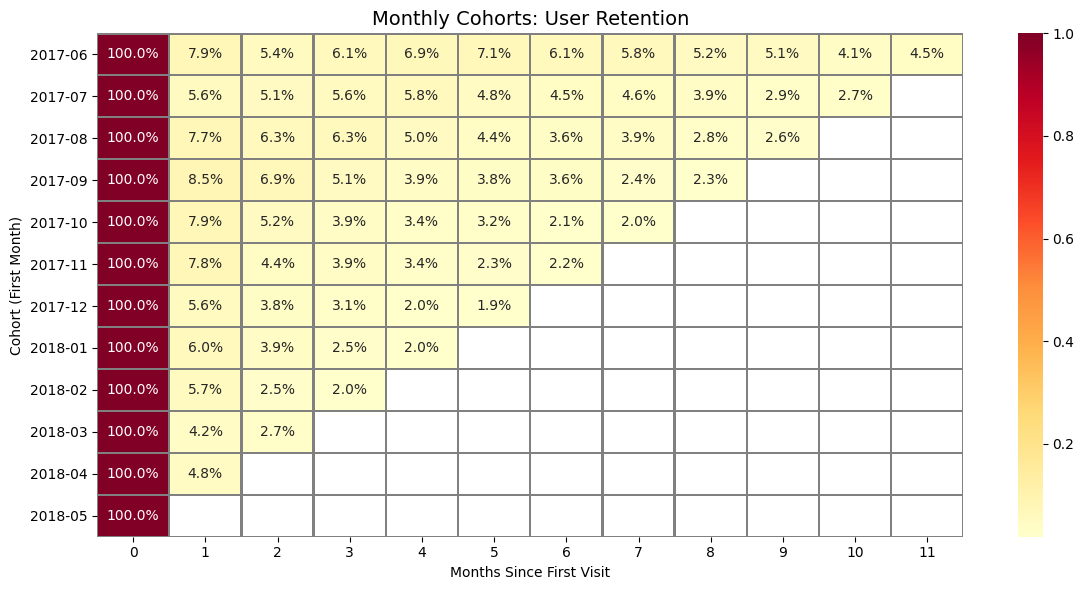

In [22]:
# Create monthly cohort label from first visit
visits['activity_month'] = visits['start_ts'].dt.to_period('M').dt.to_timestamp()

# Determine each user's first active month
first_activity_date = visits.groupby('uid')['activity_month'].min()
first_activity_date.name = 'first_activity_month'

# Assign first month to each row
visits = visits.join(first_activity_date, on='uid')

# Calculate cohort lifetime in months
visits['cohort_lifetime'] = (
    (visits['activity_month'] - visits['first_activity_month']) / np.timedelta64(1, 'M')
).round().astype(int)

# Group by cohort and lifetime, count unique users
cohorts = (
    visits.groupby(['first_activity_month', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
)

# Get initial cohort size (month 0)
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_month', 'uid']
].rename(columns={'uid': 'cohort_users'})

# Merge to full cohort data
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')

# Calculate retention
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

# Pivot for heatmap
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)

# Plot heatmap
plt.figure(figsize=(12, 6))
plt.title('Monthly Cohorts: User Retention', fontsize=14)
sns.heatmap(
    retention_pivot,
    annot=True,
    fmt='.1%',
    cmap='YlOrRd',
    linewidths=1,
    linecolor='gray'
)

# Format y-axis labels to show only year-month (e.g. 2017-06)
formatted_labels = [d.strftime('%Y-%m') for d in retention_pivot.index]
plt.yticks(ticks=np.arange(len(formatted_labels)) + 0.5, labels=formatted_labels, rotation=0)

# Format y-axis labels
plt.yticks(rotation=0)
plt.xlabel('Months Since First Visit')
plt.ylabel('Cohort (First Month)')
plt.tight_layout()
plt.show()



**Summary: Monthly User Retention**

Retention still declines sharply after the first month of a user's visit.
While initial engagement is strong (100% by definition), around 6–8% of users return in the second month, and this number continues to drop steadily over time.
By the 4th–5th month, monthly retention often falls to around 2–4%, and very few users remain active after 6 months.

This pattern confirms that Yandex.Afisha is used occasionally — users come for a specific purpose (e.g. to buy a ticket), and then leave until the next need arises.  
The data supports our decision to analyze retention on a **monthly basis**, which better reflects user behavior for event-driven services like this. 

**Notable cohort deviations**

2017-06: stronger long-tail retention (≈4–5% even after 10–11 months).

2017-08/09: above-average early retention (~7–8% in months 1–2).

2017-12 & early-2018: faster decay (≤4% by month-3), likely seasonal.

**Business Implication**

The low long-term retention is not necessarily a sign of poor performance — it reflects the nature of Yandex.Afisha as an event-driven platform.  
Users typically visit only when they plan to attend an event, so retention is expected to be low.

This makes it especially important to analyze **when users convert to buyers**, how much revenue they bring, and how quickly marketing investments pay off — which we will explore in the next section.

### Summary: Product Usage

Yandex.Afisha shows moderate overall engagement, with ~900 daily users and around 1.1 sessions per user per day.  
The most common session length is 60 seconds, suggesting that many users browse quickly, possibly just checking event availability.  
Retention drops sharply after the first month, which is expected for an event-driven platform —  
users return only when planning to attend something.  
This behavior highlights the importance of strong first-session experience and timely conversion.


# 3.1 Time to First Purchase

In [23]:
# Merge visits with orders to align user sessions and purchases
first_visit = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit.columns = ['uid', 'first_visit_ts']

first_order = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order.columns = ['uid', 'first_order_ts']

# Merge both tables
conversion = first_visit.merge(first_order, on='uid', how='inner')

# Calculate delay between first visit and first purchase
conversion['conversion_lag_days'] = (conversion['first_order_ts'] - conversion['first_visit_ts']).dt.days

# Group by lag
conversion_distribution = conversion['conversion_lag_days'].value_counts().sort_index()

# Calculate share of each group
conversion_share = (conversion_distribution / conversion_distribution.sum()).round(3)

# Display result
print('Share of converted users by number of days between first visit and first purchase:')
print(conversion_share.head(10))


Share of converted users by number of days between first visit and first purchase:
0    0.722
1    0.028
2    0.015
3    0.012
4    0.009
5    0.007
6    0.007
7    0.006
8    0.005
9    0.004
Name: conversion_lag_days, dtype: float64


To better understand how quickly users convert after their first visit,  
let’s visualize the distribution of conversion delays for the first 15 days.  
This allows us to focus on the most meaningful range, as the vast majority of conversions happen shortly after the initial session.

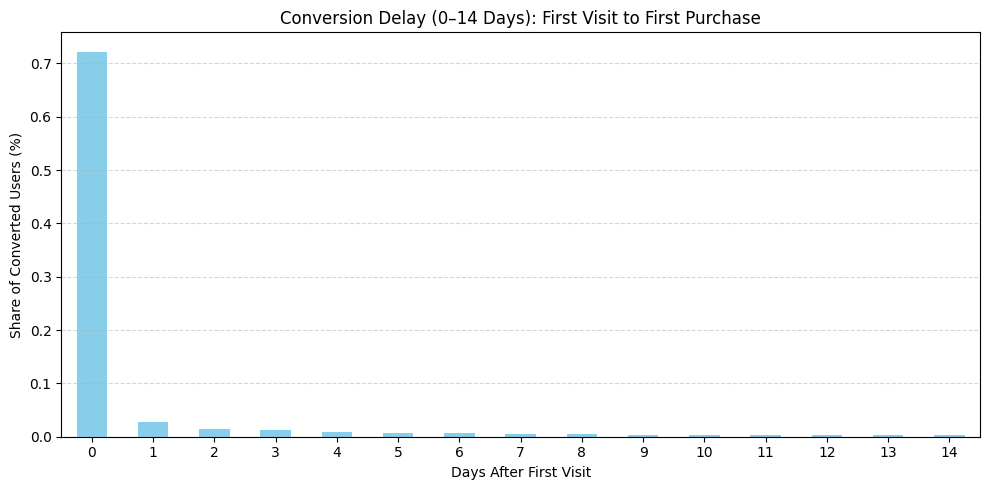

In [24]:
# Limit to first 15 days
top_conversion_share = conversion_share.head(15)

# Plot
plt.figure(figsize=(10, 5))
top_conversion_share.plot(kind='bar', color='skyblue')

plt.title('Conversion Delay (0–14 Days): First Visit to First Purchase')
plt.xlabel('Days After First Visit')
plt.ylabel('Share of Converted Users (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Summary: Conversion Timing**

The vast majority of users who eventually make a purchase do so on the same day as their first visit — 72% convert on day 0.  
Only 2.8% convert on day 1, and the share continues to drop steadily: fewer than 1% convert on any day after the third.

This indicates that user intent is very high upon the first visit.  
For Yandex.Afisha, the decision to buy a ticket is typically made during the first session, suggesting that retargeting efforts may have limited impact beyond the first few days.

Although we could break down conversion timing by marketing source (`source_id`),  
the extremely high share of same-day conversions (72%) suggests that the purchase decision is made almost immediately.  
This makes the influence of traffic source on conversion timing less critical at this stage.  
We will revisit marketing sources in more detail later in the marketing analysis section, where we evaluate CAC and ROI by channel.



# 3.2 Number of Orders per User

In [25]:
# Count number of orders per user
orders_per_user = orders.groupby('uid').size()

# Summary statistics
mean_orders = orders_per_user.mean()
median_orders = orders_per_user.median()
max_orders = orders_per_user.max()

print('Average number of orders per user:', round(mean_orders, 2))
print('Median number of orders per user:', int(median_orders))
print('Maximum number of orders by a single user:', max_orders)



Average number of orders per user: 1.38
Median number of orders per user: 1
Maximum number of orders by a single user: 239


We will also apply cohort analysis here, focusing on purchases per user. In retention analysis, a cohort was defined by a user’s first session. From this point forward, we will define cohorts by a user’s first purchase, since our interest lies in repeat purchases rather than visits.

For the upcoming LTV, CAC, and ROMI calculations, we will likewise use only buyer data, as these metrics must reflect the returns and costs associated with paying customers.

In [26]:
# Extract the order month (used for grouping)
orders['order_month'] = orders['buy_ts'].values.astype('datetime64[M]')
orders.head()

buy_ts  revenue                   uid order_month
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01

In [27]:
# Define cohort month as the month of a user's first purchase
first_purchase = (
    orders.groupby('uid')['order_month']
    .min()
    .rename('cohort_month')
)

In [28]:
orders = orders.merge(first_purchase, on='uid')
orders.head()

buy_ts  revenue                   uid order_month cohort_month
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   2017-06-01
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   2017-06-01
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   2017-06-01
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   2017-06-01
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   2017-06-01

In [29]:
# Calculate cohort age (0 = month of first purchase, 1 = second month, etc.)
orders['cohort_index'] = (
    (orders['order_month'] - orders['cohort_month']) / np.timedelta64(1, 'M')
).round().astype(int)
orders.head()

buy_ts  revenue                   uid order_month cohort_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   2017-06-01   

   cohort_index  
0             0  
1             0  
2             0  
3             0  
4             0

In [30]:
# Count total number of orders per cohort × cohort age
cohort_orders = (
    orders.groupby(['cohort_month','cohort_index'])['uid']
    .count()
    .reset_index(name='orders')
)
cohort_orders

cohort_month  cohort_index  orders
0    2017-06-01             0    2354
1    2017-06-01             1     177
2    2017-06-01             2     174
3    2017-06-01             3     226
4    2017-06-01             4     292
..          ...           ...     ...
74   2018-03-01             2     176
75   2018-04-01             0    2495
76   2018-04-01             1     195
77   2018-05-01             0    3249
78   2018-06-01             0       1

[79 rows x 3 columns]

In [31]:
# Calculate cohort size (number of unique users in the cohort)
cohort_sizes = (
    orders.groupby('cohort_month')['uid']
    .nunique()
    .reset_index(name='cohort_size')
)
cohort_sizes

cohort_month  cohort_size
0    2017-06-01         2023
1    2017-07-01         1923
2    2017-08-01         1370
3    2017-09-01         2581
4    2017-10-01         4340
5    2017-11-01         4081
6    2017-12-01         4383
7    2018-01-01         3373
8    2018-02-01         3651
9    2018-03-01         3533
10   2018-04-01         2276
11   2018-05-01         2988
12   2018-06-01            1

In [32]:
# Merge orders with cohort size and calculate average orders per user
cohort = cohort_orders.merge(cohort_sizes, on='cohort_month')
cohort['orders_per_user'] = cohort['orders'] / cohort['cohort_size']

# Create pivot table and compute cumulative orders per user
cohort_piv = cohort.pivot_table(
    index='cohort_month',
    columns='cohort_index',
    values='orders_per_user',
    aggfunc='sum'
).cumsum(axis=1)   # cumulative sum across months

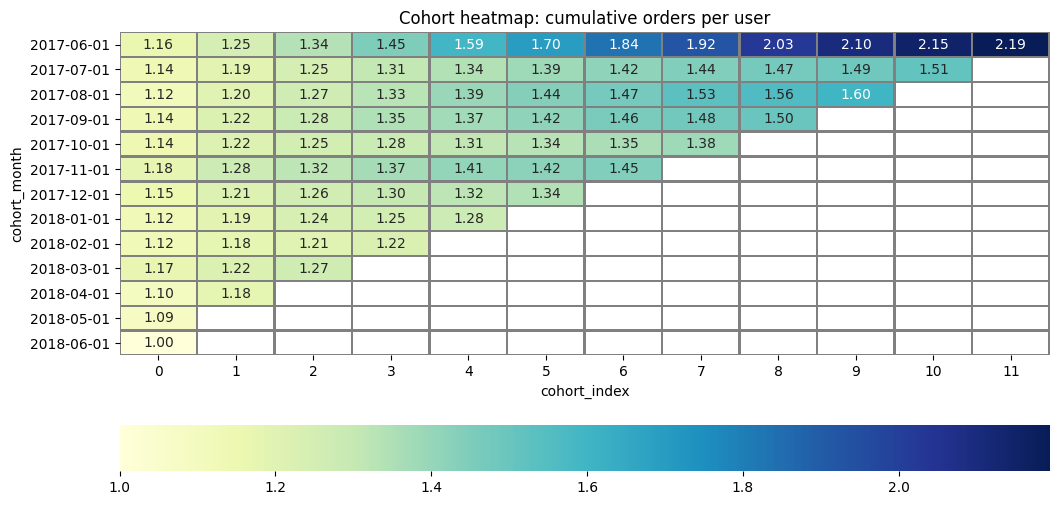

In [33]:
cohort_piv.index = cohort_piv.index.astype(str)

plt.figure(figsize=(12,6))
sns.heatmap(
    cohort_piv, 
    annot=True,          # show numbers inside cells
    fmt='.2f',           # 2 decimals
    linewidths=1, 
    linecolor='grey', 
    cmap='YlGnBu',       # color palette
    cbar_kws={'orientation': 'horizontal'}
).set(title='Cohort heatmap: cumulative orders per user')

plt.show()

Most cohorts start with about 1.1–1.2 orders per user in their first month. Over time, cumulative purchases grow steadily, reaching ~2 orders per user after 10–12 months for early cohorts (e.g., June–July 2017). These early cohorts show stronger long-term engagement compared to later ones (e.g., 2018), where growth is flatter and users remain closer to 1.2–1.3 orders per user. This suggests that acquisition quality or seasonality had a noticeable effect on repeat purchasing.

**Summary: Number of Orders per User**

The median number of orders per user is 1, and the average is only slightly higher at 1.36.  
This suggests that most users made a single purchase during the observed period.  
However, since the data only covers one year, it’s possible that some loyal users simply don’t attend events frequently —  
for example, once or twice a year — and may return the following year.  
This should be kept in mind when interpreting user repeat behavior.


# 3.3 Average purchase size

In [34]:
# Basic stats
mean_revenue = orders['revenue'].mean()
median_revenue = orders['revenue'].median()

print('Average purchase size:', round(mean_revenue, 2))
print('Median purchase size:', round(median_revenue, 2))


Average purchase size: 5.0
Median purchase size: 2.5



Cohort analysis on revenue:

In [35]:
# ensure month cols are datetime64[M]
orders['order_month'] = pd.to_datetime(orders['order_month']).values.astype('datetime64[M]')
orders['cohort_month'] = pd.to_datetime(orders['cohort_month']).values.astype('datetime64[M]')


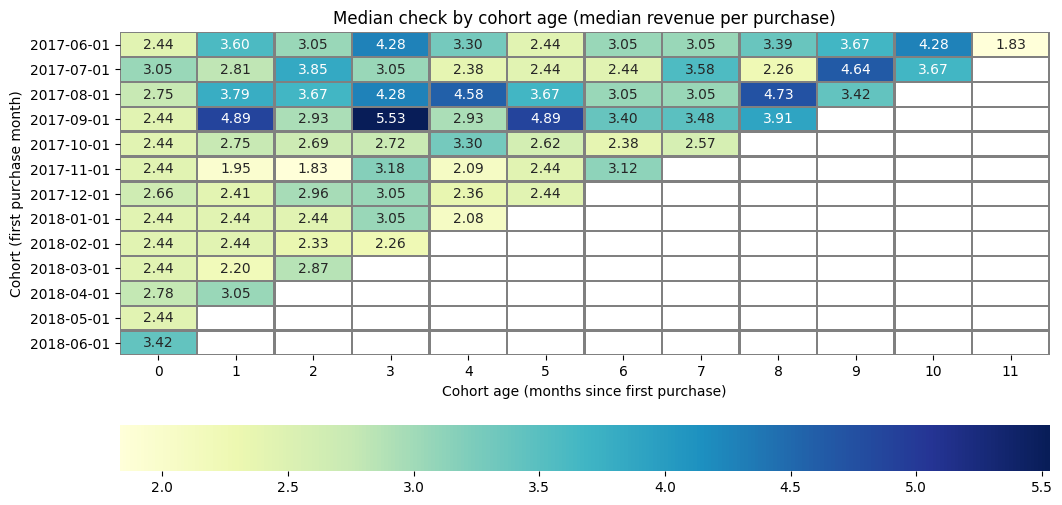

In [36]:
# median check by cohort × cohort age
median_cohort = (
    orders.groupby(['cohort_month', 'order_month'])['revenue']
    .median()
    .reset_index()
)
median_cohort['age_month'] = (
    (median_cohort['order_month'] - median_cohort['cohort_month']) / np.timedelta64(1, 'M')
).round().astype(int)

median_cohort_piv = median_cohort.pivot_table(
    index='cohort_month',
    columns='age_month',
    values='revenue',
    aggfunc='median'
).sort_index()

median_cohort_piv.index = median_cohort_piv.index.astype(str)

plt.figure(figsize=(12, 6))
sns.heatmap(
    median_cohort_piv.round(2),
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='grey',
    cmap='YlGnBu',
    cbar_kws={'orientation': 'horizontal'}
).set(title='Median check by cohort age (median revenue per purchase)')
plt.xlabel('Cohort age (months since first purchase)')
plt.ylabel('Cohort (first purchase month)')
plt.show()

Overall median check: 2.50


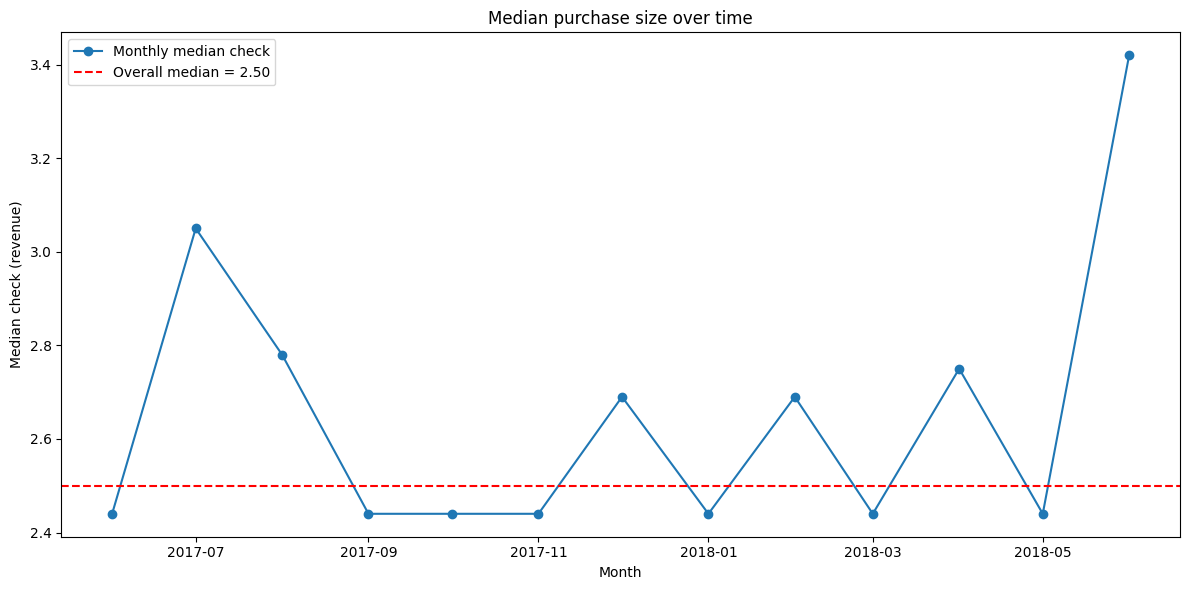

In [37]:
# monthly median purchase size
monthly_median = (
    orders.groupby(orders['buy_ts'].astype('datetime64[M]'))['revenue']
    .median()
    .reset_index()
    .rename(columns={'buy_ts': 'month', 'revenue': 'median_check'})
)

overall_median = orders['revenue'].median()
print(f'Overall median check: {overall_median:.2f}')

plt.figure(figsize=(12, 6))
plt.plot(monthly_median['month'], monthly_median['median_check'], marker='o', label='Monthly median check')
plt.axhline(overall_median, linestyle='--', color='red', label=f'Overall median = {overall_median:.2f}')
plt.title('Median purchase size over time')
plt.xlabel('Month')
plt.ylabel('Median check (revenue)')
plt.legend()
plt.tight_layout()
plt.show()

##### **Summary: Revenue per Order**

The average revenue per order is 5, while the median is 2.5.  
This suggests a skewed distribution: most transactions bring in only a few dollars,  
but a small number of high-value orders increase the average significantly.

The dataset does not specify the currency, but we assume the revenue values are in USD, based on the international context of the project.  
Also, note that the `revenue` column reflects Yandex.Afisha’s earnings from each order —  
that is, the platform’s net revenue or commission, not the full ticket price paid by the customer.

The cohort heatmap shows that the median purchase size typically falls between 2.4–3.5, with some cohorts (e.g., 2017-08, 2017-09) reaching higher spikes above 5 in certain months. This indicates occasional outliers or promotional effects within specific cohorts.

The time-series chart confirms that while the overall median check stays close to 2.5, there are notable short-term fluctuations — especially strong increases in mid-2017 and again in mid-2018.

Overall, the purchase size is relatively stable across time and cohorts, without a clear long-term upward or downward trend. The few sharp peaks suggest that variations are more likely driven by seasonality or specific campaigns rather than by systematic changes in user behavior.


# 3.4 How much money do they bring? (LTV)

In [38]:
# Total revenue and unique users
total_revenue = orders['revenue'].sum()
unique_users = orders['uid'].nunique()

# LTV approximation
ltv = total_revenue / unique_users

# Print result
print('Total revenue:', total_revenue)
print('Unique users:', unique_users)
print('Estimated LTV (1-year observed):', round(ltv, 2))


Total revenue: 252057.2
Unique users: 36523
Estimated LTV (1-year observed): 6.9


In [39]:
# Revenue per cohort × month
ltv_cohort = (
    orders.groupby(['cohort_month','order_month'])['revenue']
    .sum()
    .reset_index()
)

# Merge with cohort size
ltv_cohort = ltv_cohort.merge(cohort_sizes, on='cohort_month')

# Calculate cohort age (0 = first month, 1 = second month, etc.)
ltv_cohort['age_month'] = (
    (ltv_cohort['order_month'] - ltv_cohort['cohort_month']) / np.timedelta64(1,'M')
).round().astype(int)

# LTV = total revenue in that cohort-month / cohort size
ltv_cohort['ltv'] = ltv_cohort['revenue'] / ltv_cohort['cohort_size']

ltv_cohort.head()


cohort_month order_month  revenue  cohort_size  age_month       ltv
0   2017-06-01  2017-06-01  9557.49         2023          0  4.724414
1   2017-06-01  2017-07-01   981.82         2023          1  0.485329
2   2017-06-01  2017-08-01   885.34         2023          2  0.437637
3   2017-06-01  2017-09-01  1931.30         2023          3  0.954671
4   2017-06-01  2017-10-01  2068.58         2023          4  1.022531

In [40]:
ltv_cohort_piv = ltv_cohort.pivot_table(
    index='cohort_month',
    columns='age_month',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1).sort_index()

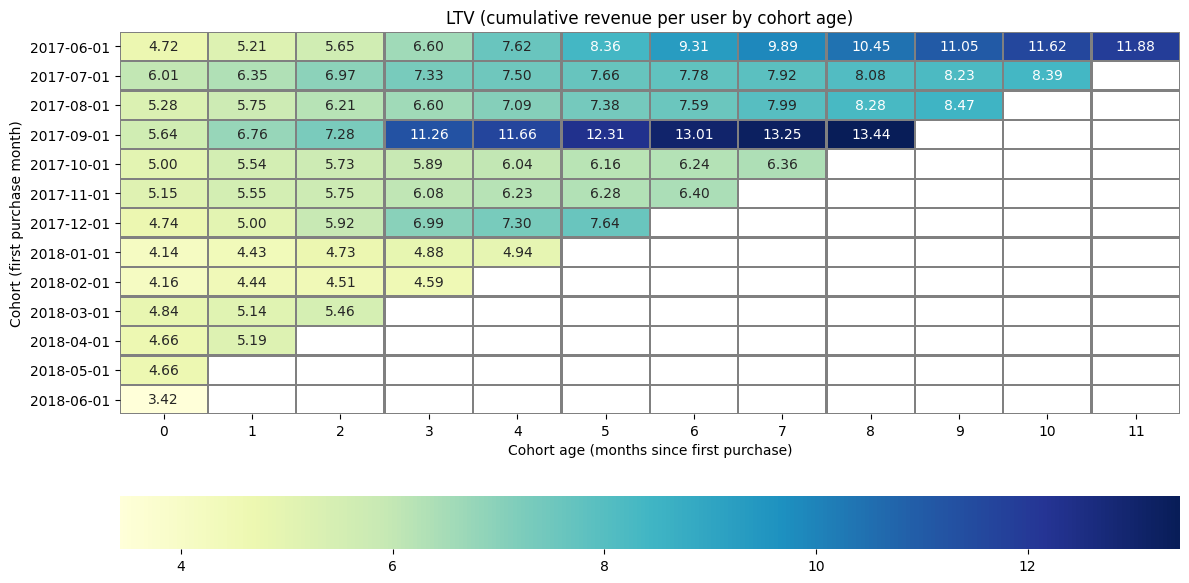

In [41]:
ltv_cohort_piv.index = ltv_cohort_piv.index.astype(str)

plt.figure(figsize=(12, 6))
sns.heatmap(
    ltv_cohort_piv.round(2),
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='grey',
    cmap='YlGnBu',
    cbar_kws={'orientation': 'horizontal'}
).set(title='LTV (cumulative revenue per user by cohort age)')
plt.xlabel('Cohort age (months since first purchase)')
plt.ylabel('Cohort (first purchase month)')
plt.tight_layout()
plt.show()

Most cohorts show a fairly stable growth in LTV, reaching around 8–9 per user after 10–12 months. This indicates that on average, each user contributes a relatively predictable revenue over time, with little variation across most cohorts. The September 2017 cohort stands out, with LTV climbing much higher — up to 13.4 by month 9 compared to ~8–9 for neighboring cohorts. This deviation likely reflects seasonality (autumn demand), targeted acquisition campaigns, or a concentration of high-value purchases.

**3.4 Lifetime Value (LTV)**

The average lifetime value (LTV) of a user is approximately $6.9.  
We calculated it as the average total revenue per user over the observed one-year period.

Since most users made only one purchase, and we don’t have multi-year data or subscriptions,  
this value represents a one-time customer contribution rather than a long-term recurring revenue stream.


## 3. Sales — Summary

The majority of users make their first purchase on the same day as their first visit (Conversion 0d),  
with over 70% converting immediately and very few users converting later. This indicates that most decisions are made on the spot.

Most users place only one order within the year, which may reflect the nature of the product — event tickets —  
as users might visit the platform only when planning specific activities.

The average revenue per order is $5, though the distribution is highly skewed.  
We assume that the revenue column reflects platform earnings, not ticket prices.

The estimated lifetime value (LTV) is approximately $6.9 per user over the one-year observation window,  
suggesting that most users generate only a small amount of revenue for the service.


# 4.1 How much money was spent? Overall, per source and over time.

Total marketing spend: $329131.62

Marketing spend by source:
source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


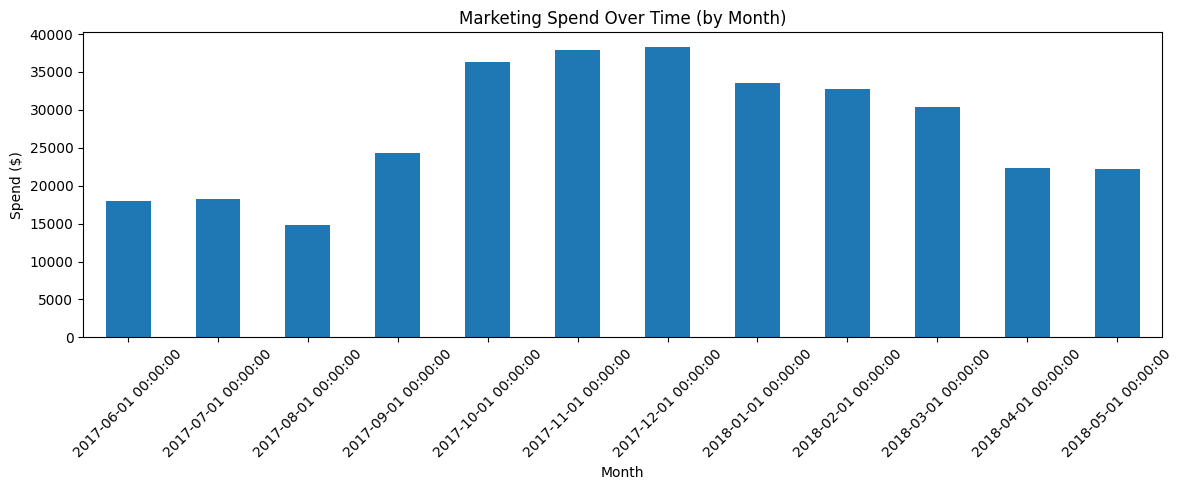

In [42]:
# 1. Total marketing spend
total_spend = expenses['costs'].sum()
print(f'Total marketing spend: ${total_spend:.2f}')

# 2. Spend per ad source
spend_by_source = expenses.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print('\nMarketing spend by source:')
print(spend_by_source)

# 3. Spend over time (by month)
expenses['month'] = expenses['dt'].values.astype('datetime64[M]')
monthly_spend = expenses.groupby('month')['costs'].sum()

plt.figure(figsize=(12, 5))
monthly_spend.plot(kind='bar')
plt.title('Marketing Spend Over Time (by Month)')
plt.xlabel('Month')
plt.ylabel('Spend ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


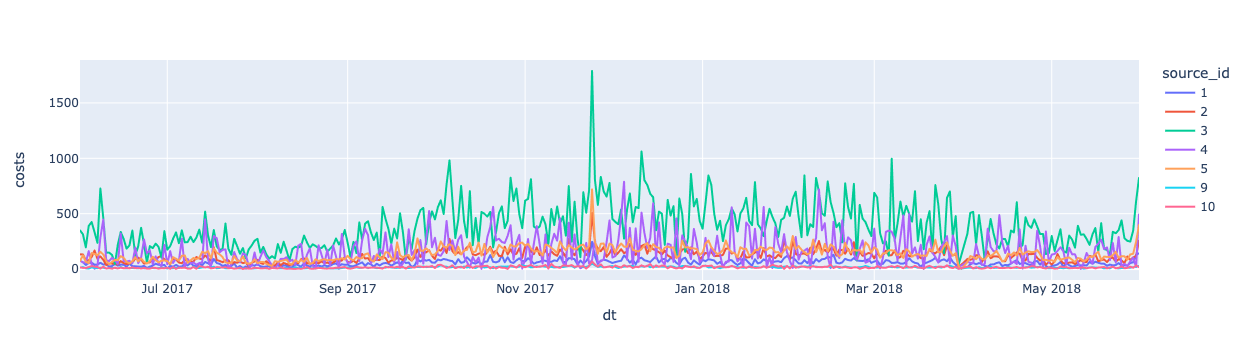

In [43]:
#plotting costs over time
fig = px.line(expenses, x="dt", y="costs", color='source_id')
fig.show()

**4.1 Marketing Spend: Total, by Source, and Over Time**

A total of 329,131.62 was spent on marketing during the observed year.  
The majority of the budget was allocated to Source 3 (over $141k), followed by Sources 4 and 5.  
Spending peaked between October and December 2017, then gradually declined through spring 2018.

Since the dataset only includes numeric source identifiers (`source_id`),  
it would be helpful to request a reference table with source names for more meaningful analysis and actionable recommendations.


# 4.2 How much did customer acquisition from each of the sources cost?  (CAC)

In [44]:
expenses_by_month=expenses.groupby(['month'])['costs'].sum().reset_index()
expenses_by_month

month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27

In [45]:
# number of unique buyers in each cohort month
buyers_per_month = (
    orders.groupby('cohort_month')['uid']
    .nunique()
    .reset_index()
    .rename(columns={'cohort_month': 'month', 'uid': 'buyers'})
)

buyers_per_month

month  buyers
0  2017-06-01    2023
1  2017-07-01    1923
2  2017-08-01    1370
3  2017-09-01    2581
4  2017-10-01    4340
5  2017-11-01    4081
6  2017-12-01    4383
7  2018-01-01    3373
8  2018-02-01    3651
9  2018-03-01    3533
10 2018-04-01    2276
11 2018-05-01    2988
12 2018-06-01       1

In [46]:

CAC_per_month=expenses_by_month.merge(buyers_per_month,how='left',on=['month'])
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month


month     costs  buyers        CAC
0  2017-06-01  18015.00    2023   8.905091
1  2017-07-01  18240.59    1923   9.485486
2  2017-08-01  14790.54    1370  10.796015
3  2017-09-01  24368.91    2581   9.441654
4  2017-10-01  36322.88    4340   8.369327
5  2017-11-01  37907.88    4081   9.288870
6  2017-12-01  38315.35    4383   8.741809
7  2018-01-01  33518.52    3373   9.937302
8  2018-02-01  32723.03    3651   8.962758
9  2018-03-01  30415.27    3533   8.608907
10 2018-04-01  22289.38    2276   9.793225
11 2018-05-01  22224.27    2988   7.437841

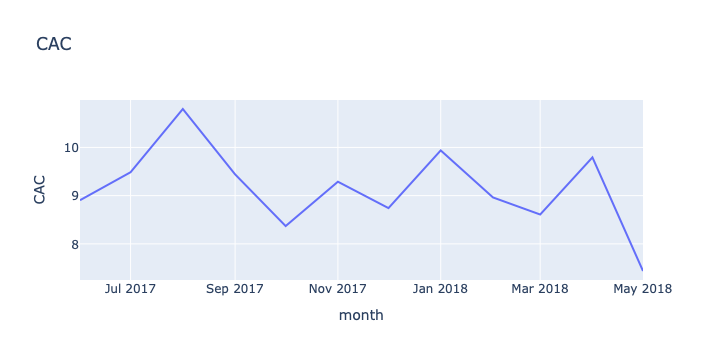

In [47]:
fig = px.line(CAC_per_month, x="month", y="CAC", title='CAC')
fig.show()

CAC fluctuates between ~7.5 and 10.7 during the observed period. The highest acquisition cost is in mid-2017, followed by a gradual decline toward the end of 2017. Overall, CAC remains relatively stable with moderate ups and downs, without a clear long-term upward trend.

**CAC per source**:

In [48]:

first_source=visits.sort_values('start_ts').groupby('uid').first()[['source_id','device']].reset_index()
first_source.columns=['uid','first_source','device']
first_source.head()


uid first_source   device
0   11863502262781            3    touch
1   49537067089222            2    touch
2  297729379853735            3  desktop
3  313578113262317            2  desktop
4  325320750514679            5  desktop

In [49]:
orders=orders.merge(first_source,on=['uid'],how='left')
orders.head()

buy_ts  revenue                   uid order_month cohort_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   2017-06-01   

   cohort_index first_source   device  
0             0            1  desktop  
1             0            2  desktop  
2             0            2  desktop  
3             0            2  desktop  
4             0            3  desktop

In [50]:
expenses_by_month_source=expenses.groupby(['month','source_id'])['costs'].sum().reset_index()
expenses_by_month_source.head()

month source_id    costs
0 2017-06-01         1  1125.61
1 2017-06-01         2  2427.38
2 2017-06-01         3  7731.65
3 2017-06-01         4  3514.80
4 2017-06-01         5  2616.12

In [51]:

buyers_per_moth_source=orders.groupby(['cohort_month','first_source'])['uid'].nunique().reset_index()
buyers_per_moth_source.columns=['month','source_id','buyers']
buyers_per_moth_source.head()


month source_id  buyers
0 2017-06-01         1     190
1 2017-06-01         2     235
2 2017-06-01         3     638
3 2017-06-01         4     413
4 2017-06-01         5     384

In [52]:
#actual cac calculations
CAC_per_month_source=expenses_by_month_source.merge(buyers_per_moth_source,how='left',on=['month','source_id'])
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()

month  source_id    costs  buyers        CAC
0 2017-06-01          1  1125.61     190   5.924263
1 2017-06-01          2  2427.38     235  10.329277
2 2017-06-01          3  7731.65     638  12.118574
3 2017-06-01          4  3514.80     413   8.510412
4 2017-06-01          5  2616.12     384   6.812813

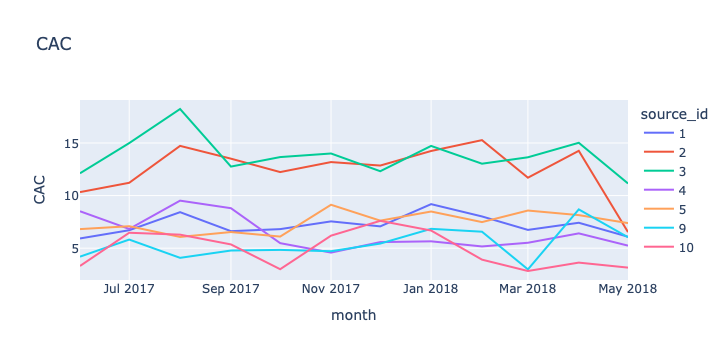

In [53]:
#plotting cac dynamics
fig = px.line(CAC_per_month_source, x="month", y="CAC",color='source_id',title='CAC')
fig.show()

Customer Acquisition Cost (CAC) measures the average marketing spend required to acquire one buyer from a given source. A lower CAC indicates more efficient acquisition, while a higher CAC means the source is more expensive. The chart shows CAC dynamics by source. Sources 2 and 3 consistently have the highest CAC (≈12–18), while sources like 1, 4, 5, 9, and 10 stay at much lower levels (≈3–9). Overall, CAC is relatively stable within each source, but the gap between expensive and cheaper channels is clear — some sources require nearly double the investment per buyer.

In [54]:
# Calculate the total number of unique buyers per source (summed across all months)
buyers_per_source = (
    CAC_per_month_source
    .groupby('source_id')['buyers']
    .sum()
    .reset_index()
    .rename(columns={'buyers': 'total_buyers'})
)

# Calculate the total marketing costs per source (summed across all months)
costs_per_source = (
    CAC_per_month_source
    .groupby('source_id')['costs']
    .sum()
    .reset_index()
    .rename(columns={'costs': 'total_costs'})
)

# Merge the two tables into one summary table
cac_per_source = buyers_per_source.merge(costs_per_source, on='source_id')

# Compute CAC = total costs / total buyers
cac_per_source['CAC'] = cac_per_source['total_costs'] / cac_per_source['total_buyers']

# Display results
cac_per_source

source_id  total_buyers  total_costs        CAC
0          1          2899     20833.27   7.186364
1          2          3506     42806.04  12.209367
2          3         10473    141321.63  13.493901
3          4         10295     61073.60   5.932356
4          5          6931     51757.10   7.467479
5          9          1088      5517.49   5.071222
6         10          1329      5822.49   4.381106

### **4.2 Customer Acquisition Cost (CAC)** 

The customer acquisition cost (CAC) varies significantly across sources.  
Source 3 is the most expensive, with a CAC of $13.49, while Sources 9, 10, 4 are much more cost-efficient.

Some sources (6, 7, 8) show no recorded conversions despite spending, resulting in undefined CAC values.  
This suggests those channels failed to attract any paying users and should be reviewed or paused in future campaigns.

**Source 4 stands out as it attracts a large number of buyers (10,295) while maintaining a low CAC (≈5.93). This makes it one of the most cost-efficient and high-volume acquisition channels compared to others.**


# 4.3 How worthwhile where the investments? (ROI)

In [55]:
# Calculate total revenue by source
revenue_by_source = orders.groupby('first_source')['revenue'].sum().reset_index()
print('Total revenue by source:')
print(revenue_by_source)

# first unify column name for merge
revenue_by_source = revenue_by_source.rename(columns={'first_source': 'source_id'})

# merge by 'source_id'
ltv_by_source = revenue_by_source.merge(buyers_per_source, on='source_id')
print(ltv_by_source)

# calculate LTV
ltv_by_source['LTV']= (ltv_by_source['revenue'] / ltv_by_source['total_buyers']).round(2)

print('\nCustomer Lifetime Value (LTV) by source:')
print(ltv_by_source)


# Calculate ROMI (LTV / CAC)
ltv_by_source['ROMI'] = (ltv_by_source['LTV'] / cac_per_source['CAC']).round(2)

print('\nReturn on Marketing Investment (ROMI) by source:')
print(ltv_by_source[['source_id','ROMI']].sort_values(by='ROMI', ascending=False))


Total revenue by source:
  first_source   revenue
0            1  31090.55
1            2  46923.61
2            3  54511.24
3            4  56696.83
4            5  52624.02
5            6      0.00
6            7      1.22
7            9   5759.40
8           10   4450.33
   source_id   revenue  total_buyers
0          1  31090.55          2899
1          2  46923.61          3506
2          3  54511.24         10473
3          4  56696.83         10295
4          5  52624.02          6931
5          9   5759.40          1088
6         10   4450.33          1329

Customer Lifetime Value (LTV) by source:
   source_id   revenue  total_buyers    LTV
0          1  31090.55          2899  10.72
1          2  46923.61          3506  13.38
2          3  54511.24         10473   5.20
3          4  56696.83         10295   5.51
4          5  52624.02          6931   7.59
5          9   5759.40          1088   5.29
6         10   4450.33          1329   3.35

Return on Marketing Investment (RO

**4.3 How worthwhile were the investments? (ROI)**

To evaluate the effectiveness of marketing efforts, we calculated ROMI (Return on Marketing Investment) for each traffic source. The formula used was:

- **LTV** = total revenue / number of buyers  
- **CAC** = marketing spend / number of buyers  
- **ROMI** = LTV / CAC

Now that we look at the ratio of LTV to CAC (ROMI), it becomes clear that some expensive sources are actually worth the investment, since their high value per customer compensates for higher acquisition costs.

**Best-performing sources:**

**Source 1** (LTV = 10.72, ROMI = 1.49) delivers strong unit economics with the highest profitability relative to costs.

**Source 2** also shows excellent LTV (13.38) and solid ROMI (1.10), making it a valuable channel despite higher CAC.

**Moderately efficient sources:**

**Sources 5 and 9** have positive ROMI (~1.0), meaning they are roughly breaking even but still generating acceptable returns. Source 9 formally shows a ROMI above 1.0, but its absolute revenue is minimal, so even if the channel pays off, it contributes very little to the overall business.

**Source 4** attracts many buyers (10k+) but has only average LTV (5.51) and ROMI below 1.0 (0.93), indicating scale but weaker profitability.

**Underperformers:**

**Source 10** (LTV = 3.35, ROMI = 0.76) and especially Source 3 (LTV = 5.20, ROMI = 0.39) are not cost-effective, as they generate much less value than the costs of acquisition.

### 4. Marketing - Summary

Over the course of the year, the company spent 329,131.62 on marketing — with the lion’s share going to Source 3 (over $141k). Spending was especially active in the last quarter of 2017, then gradually tapered off in spring 2018. However, this investment did not always bring proportional returns.

Customer acquisition cost (CAC) differed sharply by channel: Source 3 turned out to be the most expensive, while Sources 1, 9, and 10 brought in users at a much lower cost. Some sources (6, 7, 8) showed no conversions at all despite spending — a sign those campaigns likely missed the mark and should be reconsidered or paused entirely.

ROMI: Prioritize Source 1 and Source 2 as the most profitable channels.
Keep Sources 5 under observation, since it is borderline but may improve with optimization.

Consider reducing or discontinuing investment in Sources 3 and 10, unless their CAC can be significantly lowered or user quality improved.


# 5. Visualization

In this section, we will visualize key marketing performance metrics to better understand the effectiveness of different advertising sources and user behaviors.

The following visualizations will help us answer:

Which sources bring the most value?
- We'll plot LTV, CAC, and ROMI by source to evaluate which channels generate the highest returns relative to their costs.

How have the sources performed over time?
- We'll track ROMI and buyer count over time by source to detect seasonal patterns or shifts in performance.

Do user behaviors vary by device or source?
- We'll compare metrics by device and source to assess whether certain channels or platforms are more effective in attracting valuable users.

These visual insights will support strategic decisions on optimizing marketing investments and reallocating budget more effectively.

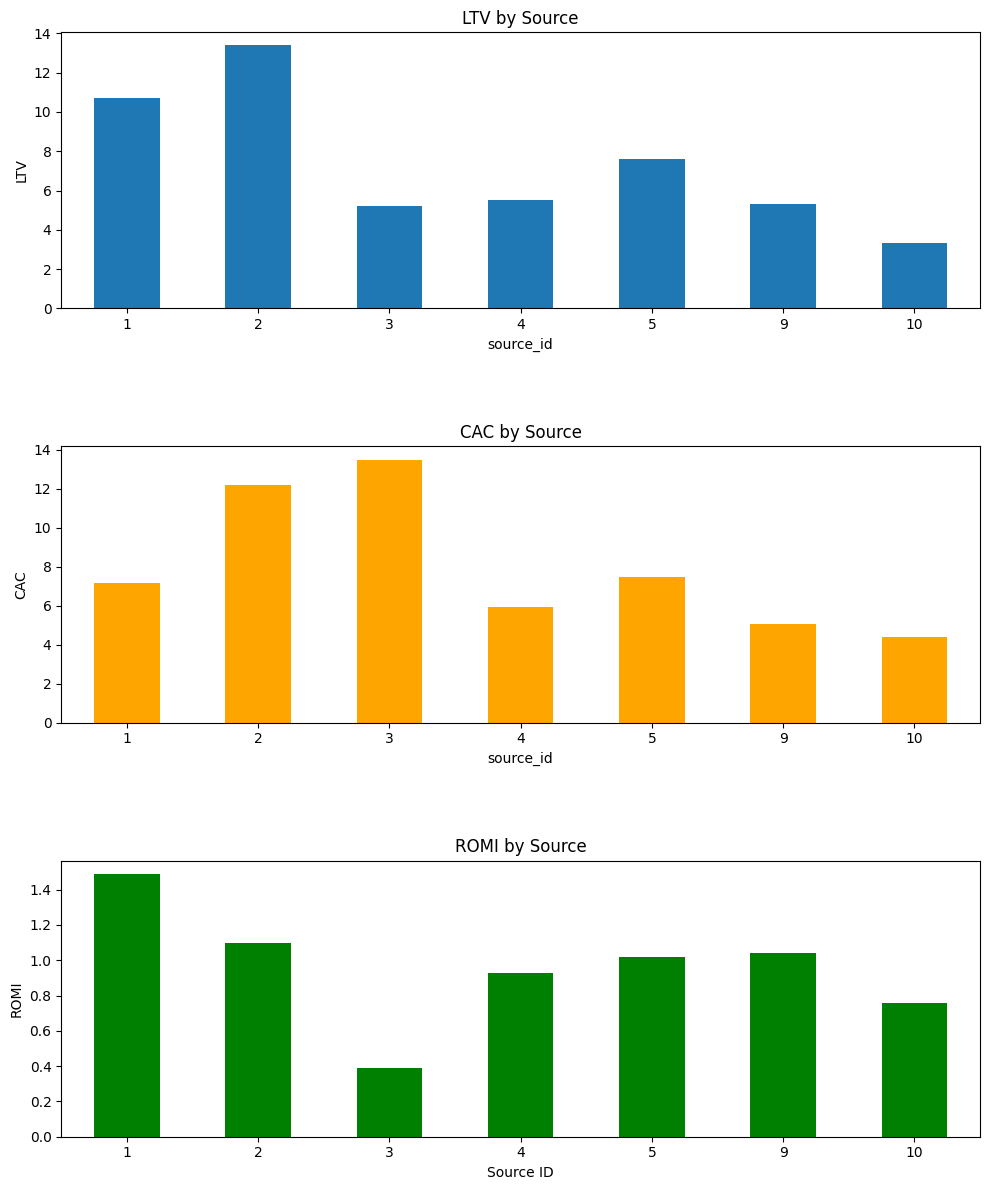

In [56]:

# Plot LTV, CAC, and ROMI by source with visible x-axis labels
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# LTV
ltv_sorted = ltv_by_source.sort_values('source_id')
ltv_sorted.set_index('source_id')['LTV'].plot(kind='bar', ax=axs[0])
axs[0].set_title('LTV by Source')
axs[0].set_ylabel('LTV')
axs[0].set_xticklabels(ltv_sorted['source_id'], rotation=0)

# CAC
cac_sorted = cac_per_source.sort_values('source_id')
cac_sorted.set_index('source_id')['CAC'].plot(kind='bar', ax=axs[1], color='orange')
axs[1].set_title('CAC by Source')
axs[1].set_ylabel('CAC')
axs[1].set_xticklabels(cac_sorted['source_id'], rotation=0)

# ROMI
romi_sorted = ltv_by_source.sort_values('source_id')
romi_sorted.set_index('source_id')['ROMI'].plot(kind='bar', ax=axs[2], color='green')
axs[2].set_title('ROMI by Source')
axs[2].set_ylabel('ROMI')
axs[2].set_xlabel('Source ID')
axs[2].set_xticklabels(romi_sorted['source_id'], rotation=0)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


**LTV by Source**
Sources 1 and 2 show the highest customer lifetime value (LTV), meaning users from these sources bring in the most revenue over time.

**CAC by Source**
Source 3 has the highest customer acquisition cost (CAC), indicating it’s the most expensive to convert users there. In contrast, sources like 1, 9, and 10 are much more cost-effective, hinting at better-targeted or more efficient campaigns.

**ROMI by Source**
Sources 1, 2, 5, 9 have a ROMI (Return on Marketing Investment) clearly above 1 — the break-even point. This means they generated more revenue than was spent to attract users. Others are less efficient and might require strategy adjustments.

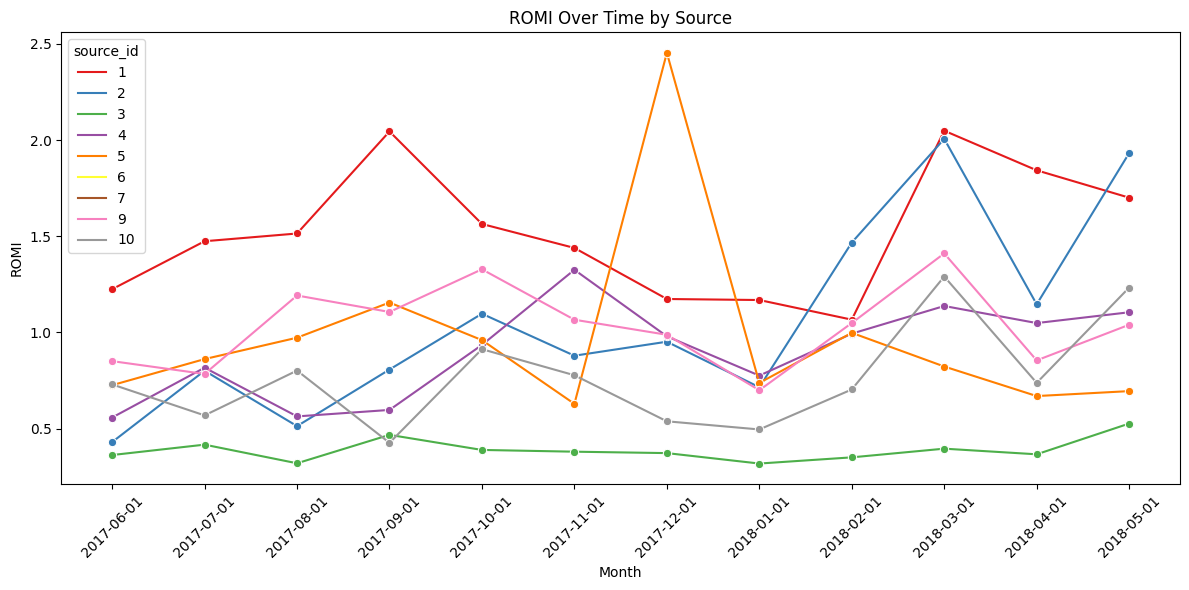

In [57]:
# rename columns
orders = orders.rename(
    columns={
        'order_month': 'month',
        'first_source': 'source_id'
    }
)

# Aggregate spend per source per month
spend_by_source_monthly = (
    expenses.groupby(['month', 'source_id'])['costs'].sum().reset_index()
)


# Aggregate revenue and unique buyers per source per month
monthly_revenue = (
    orders.groupby(['month', 'source_id'])['revenue'].sum().reset_index()
)
monthly_buyers = (
    orders.groupby(['month', 'source_id'])['uid'].nunique().reset_index()
)

# Merge all together
romi_data = (
    monthly_revenue
    .merge(monthly_buyers, on=['month', 'source_id'], suffixes=('_revenue', '_buyers'))
    .merge(spend_by_source_monthly, on=['month', 'source_id'], how='left')
)

# Calculate LTV, CAC, ROMI
romi_data['ltv'] = romi_data['revenue'] / romi_data['uid']
romi_data['cac'] = romi_data['costs'] / romi_data['uid']
romi_data['romi'] = romi_data['ltv'] / romi_data['cac']

# Convert 'month' from Period to string for plotting
romi_data['month'] = romi_data['month'].astype(str)

# Define a vibrant color palette
palette = sns.color_palette('Set1', n_colors=romi_data['source_id'].nunique())

# Plot ROMI over time by source with distinct colors
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=romi_data,
    x='month', y='romi',
    hue='source_id', marker='o',
    palette=palette
)
plt.title('ROMI Over Time by Source')
plt.xlabel('Month')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**ROMI Over Time by Source**
The chart shows that ROMI varies significantly by source.
Source 1 and Source 2 consistently perform best, maintaining values above 1 (profitable).
Source 3 stays well below 1, indicating weak returns.
Souce 5 shows volatility, with a sharp spike in late 2017 but otherwise moderate results.
Other sources (4, 9, 10) remain around or slightly above 1, indicating marginal profitability.

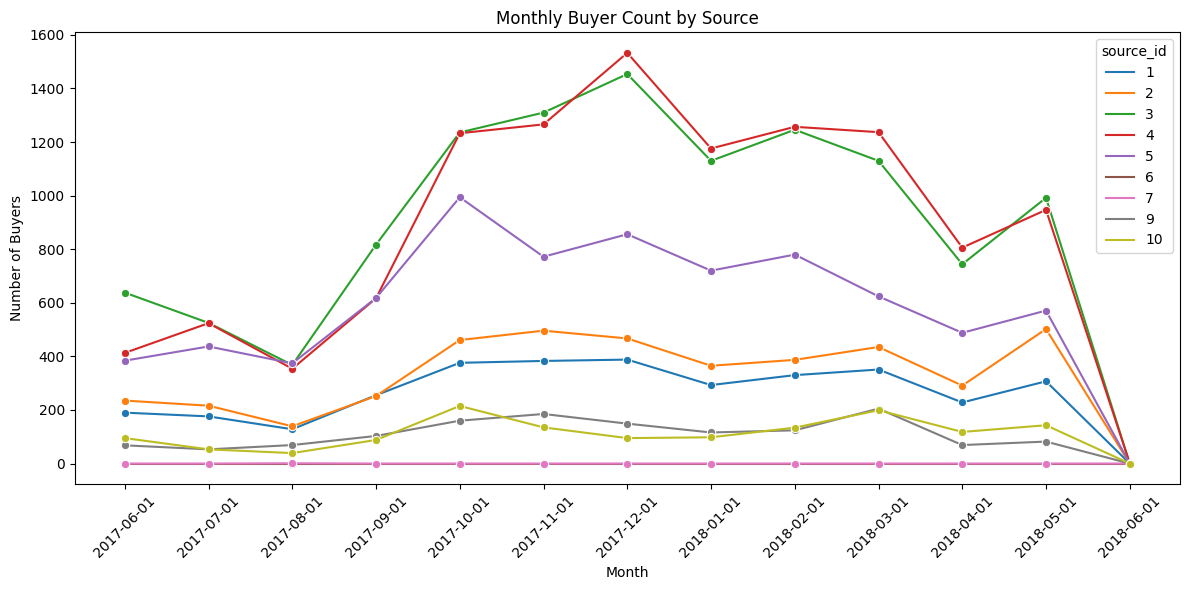

In [58]:
# Monthly_buyers already exists with 'uid' as the buyer count column
monthly_buyers.rename(columns={'uid': 'buyers'}, inplace=True)

# Convert 'month' to string for plotting
monthly_buyers['month'] = monthly_buyers['month'].astype(str)

# Plot buyer count over time by source
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_buyers,
    x='month',
    y='buyers',
    hue='source_id',
    marker='o',
    palette='tab10'
)
plt.title('Monthly Buyer Count by Source')
plt.xlabel('Month')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Monthly Buyer Count by Source**
Sources 3 and 4 dominate buyer acquisition, peaking in late 2017 with over 1400–1500 buyers per month.
Source 5 shows steady mid-range performance (600–1000 buyers) but declines after the peak.
Sources 1 and 2 bring fewer buyers (200–500 monthly), but stay stable over time.
Sources 9 and 10 contribute a small but visible share.
Source 7 is negligible with almost no buyers.

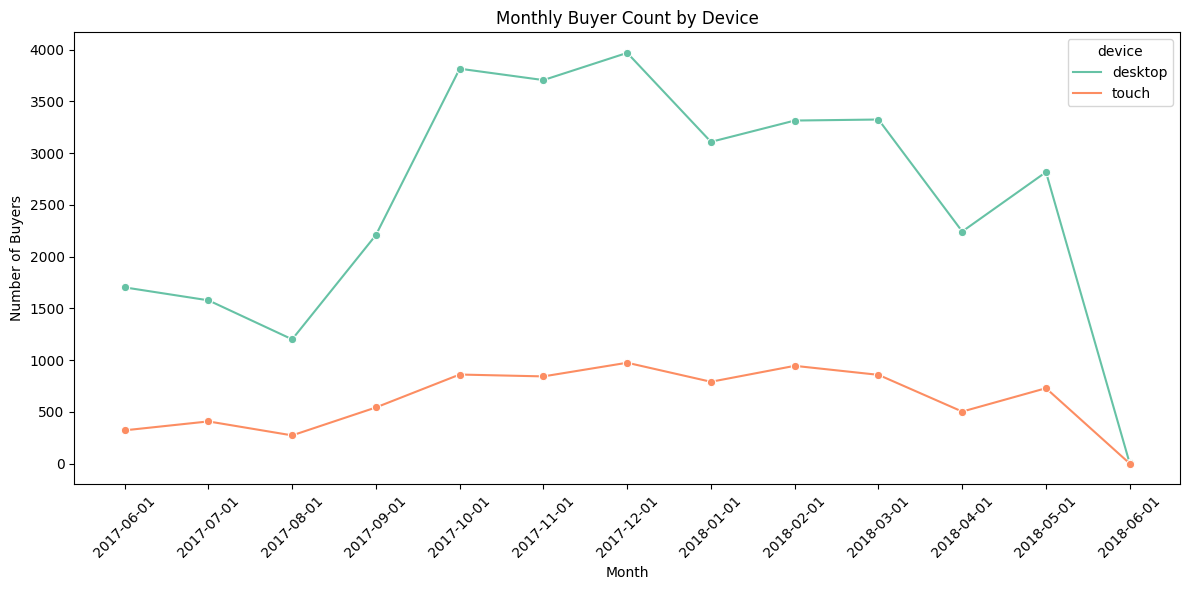

In [59]:
# Group by month and device, count unique buyers
monthly_buyers_by_device = (
    orders.groupby(['month', 'device'])['uid']
    .nunique()
    .reset_index(name='buyers')
)

# Convert 'month' to string for plotting
monthly_buyers_by_device['month'] = monthly_buyers_by_device['month'].astype(str)

# Plot buyer count over time by device
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_buyers_by_device,
    x='month',
    y='buyers',
    hue='device',
    marker='o',
    palette='Set2'
)
plt.title('Monthly Buyer Count by Device')
plt.xlabel('Month')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Monthly Buyer Count by Device**
Desktop dominates across the entire period, with peaks near 4,000 buyers in late 2017.
Touch (mobile) shows steady but much lower usage, rarely exceeding 1,000 buyers.

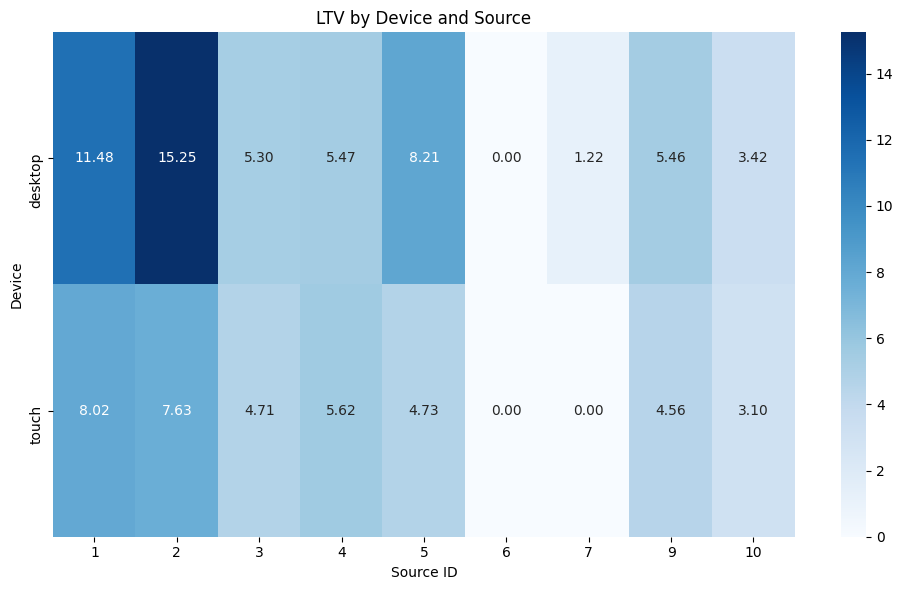

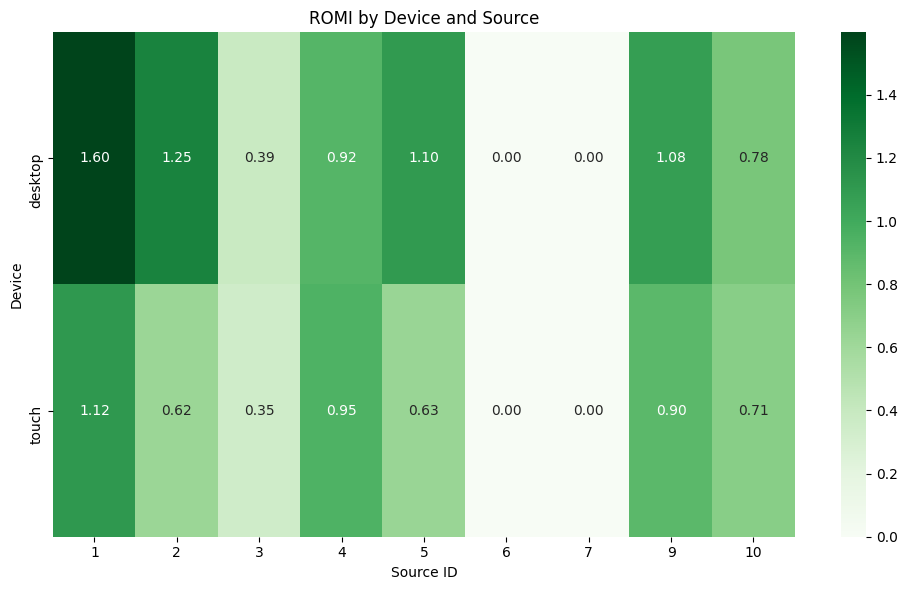

In [60]:
# LTV per (device, source)
ltv_device_source = (
    orders.groupby(['device', 'source_id'])['revenue'].sum()
    .div(orders.groupby(['device', 'source_id'])['uid'].nunique())
)

ltv_pivot = ltv_device_source.unstack('source_id')
cac_series = cac_per_source.set_index('source_id')['CAC']

# ROMI = LTV / CAC 
romi_pivot = ltv_pivot.divide(cac_series, axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(ltv_pivot.fillna(0), annot=True, fmt='.2f', cmap='Blues')
plt.title('LTV by Device and Source')
plt.ylabel('Device'); plt.xlabel('Source ID')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(romi_pivot.fillna(0), annot=True, fmt='.2f', cmap='Greens')
plt.title('ROMI by Device and Source')
plt.ylabel('Device'); plt.xlabel('Source ID')
plt.tight_layout(); plt.show()



**LTV by Device and Source (Heatmap)**
Desktop users consistently generate higher LTV, especially via Sources 1 and 2 (LTV > 11–15). Touch users show lower values across almost all sources, with Source 2 being the strongest among them. Overall, desktop campaigns appear to attract significantly more valuable customers.

**ROMI by Device and Source (Heatmap)**
The most profitable combination is Desktop + Source 1 (ROMI ~1.6), followed by Desktop + Sources 2, 5, and 9 (ROMI ~1.1–1.25). Touch users deliver weaker returns overall, with Sources 2, 3, and 5 performing particularly poorly (ROMI < 0.7). These findings suggest prioritizing desktop-focused campaigns, while touch channels may need optimization or reduced spend.


### Overall Visualization Summary

The visual analysis shows that traffic volume alone is not a sign of success. While some sources bring high user counts, only Source 1 demonstrates strong efficiency and ROI — especially among desktop users. This highlights the importance of evaluating marketing not just by scale but by return. Future budget allocation should prioritize channels that balance cost with sustained value.

## 5. Final Conclusion and Recommendations

We analyzed user behavior, conversion, and marketing performance using key business metrics, including **LTV, CAC, ROMI**, and user engagement indicators. Based on this analysis, we propose a **data-driven reallocation of marketing budgets** to improve overall efficiency.

### Top-Performing Sources

**Source 1 and Source 2** stand out as the most effective channels:
- ROMI consistently above 1  
- Strong LTV  
- Low CAC  
- Stable performance over time  

**Recommendation:** Increase investment in these sources.

### Medium-Performing Sources

**Source 4 and Source 5** demonstrate moderate but stable performance:
- ROMI around 1  
- Predictable user flow and revenue  

**Recommendation:** Maintain current budgets and focus on improving targeting and creative strategies.

### Underperforming Source

**Source 3** shows weak efficiency:
- Highest CAC  
- Low ROMI despite high traffic volume  

**Recommendation:** Pause investment or significantly optimize this channel before further spending.

### Device-Level Insights

Desktop users generate higher **LTV** and **ROMI** compared to touch devices.

**Recommendation:** Prioritize desktop-focused marketing campaigns.

### Final Business Recommendation

- Allocate more budget to high-performing sources (Source 1 & 2)  
- Reassess or limit spending on inefficient channels  
- Focus marketing decisions on **return on investment**, not just traffic volume

